# Kmeans Clustering

Use a real world dataset and perform kmean clustering

**Lecture section: TC1L**

**Tutorial section: TT2L**

| | Student ID     | Student Name                        
|--:|:-------------|:------------------------------------
| 1 | 1211101888   | SHAHNAZ BINTI HUSAIN SUKRI          
| 2 | 1221303909   | MUHAMMAD UKASYAH BIN MD YUSOF           
               


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p = pd.read_csv("whr_2017.csv") #Read the dataset
p.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
# Subset of attributes
p1 = p[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
            'Generosity','Trust..Government.Corruption.','Dystopia.Residual']]

In [4]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans  
import warnings #to ignore warnings

# For scaling the data
ss = StandardScaler()
X = ss.fit_transform(p1)

print(X)    

[[ 1.93599602  1.50618765  1.20357658 ...  0.8569643   1.90308437
   0.85629599]
 [ 1.92269283  1.18651768  1.26503623 ...  0.80685634  2.73999784
   0.92989102]
 [ 1.90672969  1.1823454   1.47266877 ...  1.70201314  0.30006609
   0.94796425]
 ...
 [-1.77816933 -1.12910094 -0.51306362 ...  0.79923322 -0.56334657
  -2.4660431 ]
 [-2.17193469 -2.12929212 -1.95262416 ... -0.31596505 -0.38459935
  -0.33549229]
 [-2.35994869 -2.34773594 -4.15212515 ...  0.253028   -0.65680192
   0.43290816]]


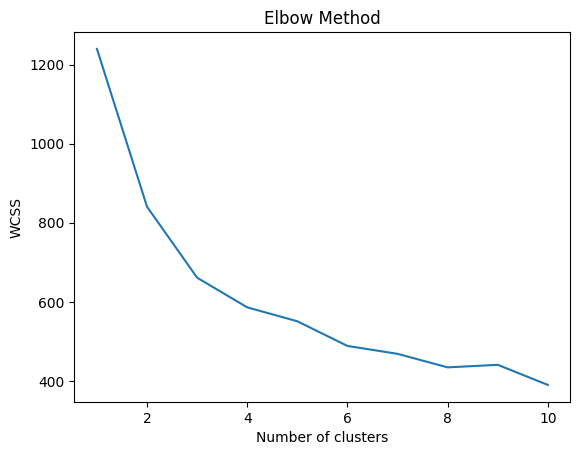

In [5]:
#using elbow method to find optimal number of clusters
#calculating within-cluster sum of square(WCSS) for different number of clusters

wcss = []
for i in range(1, 11): #trying cluster size 1-11
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #get quality of each number of cluster results

# Plot the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
#apply k-means function using optimal number of clusters = 3
model = KMeans(3, verbose=0, n_init='auto')
# 3 clusters (3 groups), n_init= 'auto' (auto random pick cluster centre from existing data points)
model.fit(X) 

KMeans(n_clusters=3)

In [7]:
print(model.cluster_centers_.shape)
model.cluster_centers_
# a cluster point is for each attribute = 8

(3, 8)


array([[ 1.33461682,  1.15010587,  0.87939027,  0.96525892,  1.08590134,
         0.82255539,  1.44554726,  0.24730972],
       [ 0.14300288,  0.27116152,  0.29600914,  0.33935749, -0.11567503,
        -0.4117311 , -0.4510479 ,  0.00177931],
       [-1.11599418, -1.21575948, -1.08187891, -1.21232629, -0.50953724,
         0.17065425, -0.16812248, -0.16434472]])

In [8]:
#kmeans label for plotting
print(model.labels_.shape)
kmeans_labels = pd.DataFrame(model.labels_)
kmeans_labels

(155,)


,0
0,0
1,0
2,0
3,0
4,0
...,...
150,2
151,2
152,2
153,2


In [9]:
# quality of clustering results
model.inertia_  

659.0117510775931

In [10]:
p1.insert((p1.shape[1]), 'kmeans', kmeans_labels)
p1.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0


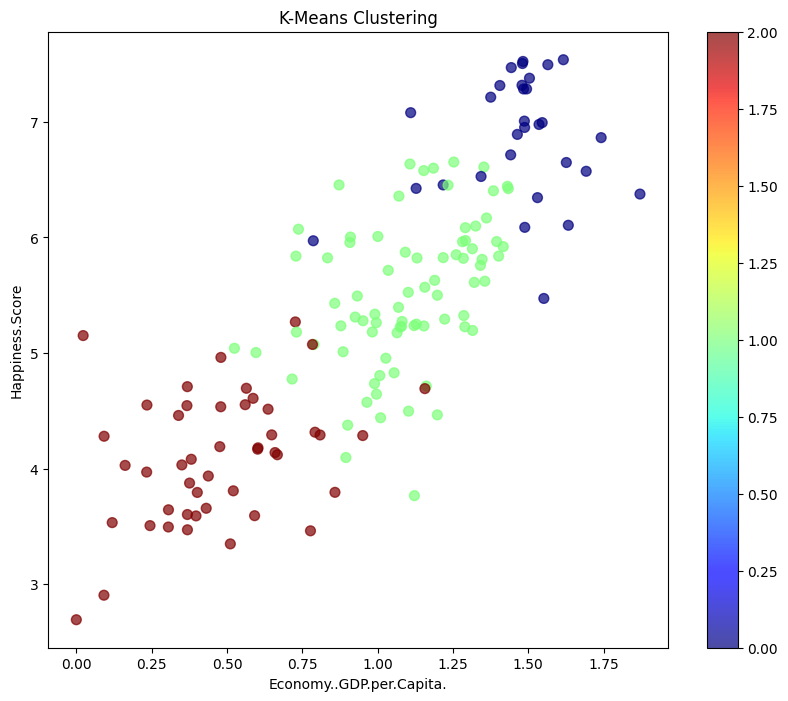

In [11]:
# Function to plot scatter plot for kmeans clustering
def plot_kmeans_scatter(v1, v2):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111) # 1 row 1 column 1 plot
    scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7) #s = cirlce size, aplha = transparency cmap = colour map
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(v1.name)
    ax.set_ylabel(v2.name)
    plt.colorbar(scatter)
    plt.show()
    
v1 = p1['Economy..GDP.per.Capita.']
v2 = p1['Happiness.Score']
v3 = p1['Health..Life.Expectancy.']

# GDP per Capita vs Happiness Score
plot_kmeans_scatter(v1, v2)

### Analysis (GDP per Capita vs Happiness Score)

- Cluster 1 (green) indicates data points with lower GDP per capita and lower happiness scores. This cluster might represent countries with weaker economies and lower happiness levels. 
- Cluster 0 (blue) indicates data points with moderate GDP per capita and moderate to high happiness scores. This cluster might represent countries with moderate economic performance and varying happiness levels.
- Cluster 2 (red) indicates data points with higher GDP per capita and higher happiness scores. This cluster might represent countries with strong economies and high happiness levels.

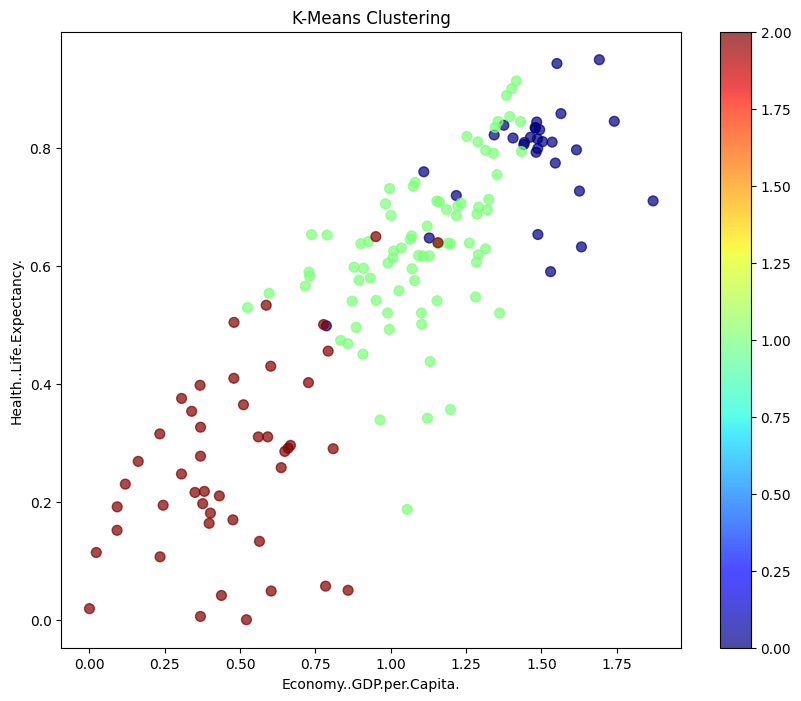

In [12]:
# GDP per Capita vs Health Life Expectancy
plot_kmeans_scatter(v1, v3)

### Analysis (GDP per Capita vs Health Life Expectancy)

- Cluster 1 (green) indicates data points with lower GDP per capita and lower life expectancy. This cluster might represent countries with weaker economies and poorer health conditions.
- Cluster 0 (blue) indicates data points with moderate GDP per capita and moderate to high life expectancy. This cluster might represent countries with moderate economic performance and varying health conditions.
- Cluster 2 (red) indicates data points with higher GDP per capita and higher life expectancy. This cluster might represent countries with strong economies and good health conditions.

### References

**Dataset Source:** [World Happiness 2017](https://www.kaggle.com/datasets/unsdsn/world-happiness)